# **Setup** 
Reset the Python environment to clear it of any previously loaded variables, functions, or libraries. Then, import the libraries needed to complete the code Professor Melnikov presented in the video.

In [2]:
%reset -f
from IPython.core.interactiveshell import InteractiveShell as IS
IS.ast_node_interactivity = "all"    # allows multiple outputs from a cell
import numpy as np, pandas as pd, matplotlib.pyplot as plt
import plotly.figure_factory as ff   # to plot vector fields

<hr style="border-top: 2px solid #606366; background: transparent;">

# **Review**

<span style="color:black">You will investigate and compare three key metrics used in NLP, machine learning, and this course: dot product, cosine similarity, and Euclidean (or L2) distance. Refer to the **Similarity Metrics Tool** available on the previous page for more details on the conceptual or mathematic basis of any of these techniques.

## Calculate Dot Products

Compute the dot product of two vectors by first pairing all elements into a list of tuples, then compute the product of each pair of elements. Sum all of the values to calculate the dot product.

In [3]:
A, B = [1,1,1], [0,1,2]   # vectors as lists
LTnZipped = list(zip(*(A,B)))
print(LTnZipped)
sum(a*b for a,b in LTnZipped) # dot product

[(1, 0), (1, 1), (1, 2)]


3

Note that this calculation will fail if the vectors are of different lengths because you would have unmatched elements of A or B. This highlights an important fact: Dot product and most metrics require that the two objects be in the same space. You cannot (naturally) a compute dot product between 3D and 4D vectors, just like you cannot (naturally) compute the similarity between a word (i.e. a sequence of characters) and a number.
    
The `zip` function is fast (since it uses a generator), but it is faster to use `NumPy` for element-wise operations. There are several ways to compute the dot product with `NumPy`. The multiplication operation here is element-wise, so it returns a vector, the elements of which can then be summed. A dot product with `A @ B` notation is arguably the simplest and most elegant.

In [4]:
A, B = np.array(A), np.array(B)  # vectors as NumPy arrays
print(A * B)
sum(A * B), A @ B, np.dot(A,B), np.inner(A,B)

[0 1 2]


(3, 3, 3, 3)

## Calculate Cosine Similarity

Cosine similarity is a standardized version of dot product. The code example below computes cosine similarity the long way, i.e., rescales each vector and finalizes with a dot product.

In [5]:
lenA = (A @ A)**0.5 # length/magnitude/norm of A
lenB = (B @ B)**0.5 
unitA = A / lenA    # same direction as A, but has unit length (a magnitude of 1)
unitB = B / lenB
unitA @ unitB       # cosine of the angle between A and B vectors

0.7745966692414835

However, NumPy has a `norm()` function, which computes different types of norms and the L2 norm by default. You can also compute the cosine of the angle and the actual angle. The cosine is easier to interpret than the angle itself, which should be standardized to some $\pi$ interval or degrees interval.

In [6]:
import math
from numpy.linalg import norm

CosSimAB = A @ B / norm(A) / norm(B)
angleAB = np.arccos(CosSimAB)                        # in radians, range [0, pi]
angleAB, angleAB / np.pi*180, math.degrees(angleAB)  # in radians and degrees

(0.6847192030022828, 39.23152048359225, 39.231520483592256)

Note that SciPy has a cosine distance which is opposite (in an additive sense) to similarity. You can use this metric to compute the similarity, but be careful not to confuse it with a direct measure of similarity! 

In [7]:
from scipy.spatial.distance import cosine
1 - cosine(A,B)   # convert distance to similarity

0.7745966692414834

If you have a list of vectors and want to compute all pairwise cosine similarities, use `sklearn`'s `cosine_similarity` function. This function returns a symmetric matrix with off-diagonal elements as pairwise similarities. Diagonal values are always 1s because those are similarities of vectors with themselves.

In [8]:
from sklearn.metrics.pairwise import cosine_similarity

X, Y, Z = [1,0,0], [0,1,0], [0,0,1]  # all vectors are aligned with axes in 3D space
CosSimXYZ = cosine_similarity([X,Y,Z])
CosSimXYZ

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

You can confirm that all three vectors are orthogonal to each other by computing their pairwise angle. Recall that two vectors are orthogonal (or perpendicular) if their dot product is zero. 

In [9]:
np.arccos(CosSimXYZ)/np.pi*180

array([[ 0., 90., 90.],
       [90.,  0., 90.],
       [90., 90.,  0.]])

## Euclidean (or L2) Distance

There are an infinite number of  Euclidean distances (called Lp distances), but the two most popular are L2 and L1 because they are easier to interpret than other metrics. 

Run the following code to use several different techniques to compute the L2 distance between two vectors, A and B.

In [10]:
from scipy.spatial.distance import euclidean

A, B = np.array([0,1]), np.array([0,2])

Dist1 = np.sqrt( (A[0] - B[0])**2 + (A[1] - B[1])**2)
Dist2 = (sum((A - B)**2))**0.5 
Dist3 = norm(A - B) 
Dist4 = euclidean(A, B)
print(Dist1, Dist2, Dist3, Dist4)

1.0 1.0 1.0 1.0


Next, draw several vectors with the target vector $a$ in red. The goal is to use L2 and cosine similarity to find the closest vectors. 

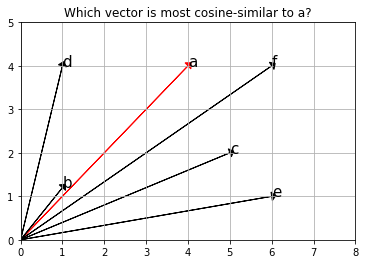

In [11]:
%matplotlib inline
def DrawVec(x, text='', col='black', width=0.001):
  ax.arrow(x=0, y=0, dx=x[0], dy=x[1], width=width, head_width=0.2, head_length=0.1, fc=col, ec=col);
  ax.text(x[0], x[1], s=text, size=15, color='black');

ax = plt.axes();
a = [4,4]
vecs = dict(b=[1,1.2], c=[5,2], d=[1,4], e=[6,1], f=[6,4])
DrawVec(a, 'a', col='red');
_ = [DrawVec(coord, name) for name, coord in vecs.items()];

ax.set_title('Which vector is most cosine-similar to a?');
plt.grid();
plt.xlim(0,8);
plt.ylim(0,5);
plt.show();

The vector $b$ is closest to $a$ based on cosine similarity because the angle between them is the smallest (since $\angle ab<\angle af<\angle ac<\angle ad<\angle ae$), even though the points ($a$ and $b$) themselves are far apart. Recall that the length of each vector is rescaled to be a unit, so the most important property here is the direction of the two vectors, not their lengths.

In [12]:
GetCosSim = lambda x,y: 1 - cosine(x,y)
Rnd = lambda x: np.round(x, 4)
Similar2a = [(Rnd(GetCosSim(a, coord)), name) for name, coord in vecs.items()]
print(sorted(Similar2a, reverse=True))

[(0.9959, 'b'), (0.9806, 'f'), (0.9191, 'c'), (0.8575, 'd'), (0.8137, 'e')]


If you now pick a neighbor of $a$ based on L2 distance, then the vector $f$ stands out because it is closest in distance terms.

In [13]:
GetCosSim = lambda x,y: 1 - cosine(x,y)
Closest2a = [(Rnd(euclidean(a, coord)), name) for name, coord in vecs.items()]
print(sorted(Closest2a, reverse=False))

[(2.0, 'f'), (2.2361, 'c'), (3.0, 'd'), (3.6056, 'e'), (4.1037, 'b')]


<hr style="border-top: 2px solid #606366; background: transparent;">

# **Optional Practice**

Below you are given a query vector $q:=[1,0]'$ and a large number of 2D candidate vectors (rows of a dataframe `df`) with coordinates $x_1,x_2$ among which you need to find the "closest" vector $x$ in terms of the metrics learned above: dot product, cosine similarity, and Euclidean distance. 

For each task, you will measure the similarity of each candidate vector $x$ (a row in `df`) with the query vector $q$ and then pick the candidate with the highest similarity or lowest dissimilarity (if using Euclidean or L2 metric).

For each task, you need to return:

1. Dot product $q\bullet x$
1. $x$ vector itself
1. The integer index of $x$ (its row number in a `df`)

Then replot the image below with original vectors in `df` in blue, $q$ in red, and $x$ in green. 

All $n$ vectors in `df` are indexed starting with 0 and up to $n-1$.

In [ ]:
n = 1000            # number of candidate vectors - rows in a dataframe df
q = np.array([1,0]) # query vector: horizontal vector (of length 1), along x axis, pointing to positive infinity
np.random.seed(0)   # fixes the random number generator to ensure reproducibility of random values
x1 = np.random.uniform(low=-2, high=2, size=n) # n first coordinates of candidate vectors
x2 = np.random.uniform(low=-1, high=1, size=n) # n second coordinates of candidate vectors

df = pd.DataFrame([x1,x2], index=['x1','x2']).T   # package vectors as dataframe with coordinates names
df.T.round(1)

In the plot, the query vector $q$ is shown in red and you are tasked with finding and plotting the closest vectors (with respect to the proposed metric). 

Note: we use Plotly's [figure factory](https://plotly.com/python/figure-factory-subplots/) to efficiently plot all vectors by passing all coordinates `df.x1` and `df.x2` at once to its [create_quiver()](https://plotly.github.io/plotly.py-docs/generated/plotly.figure_factory.create_quiver.html) method. 

In [ ]:
z = np.zeros(n)  # all vectors originate from the origin of the Cartesian coordinate system, i.e. [0,0]
f = ff.create_quiver(x=z, y=z, u=df.x1, v=df.x2, arrow_scale=.05, scale=1, name='Candidates (rows of df)', line=dict(width=0.3))
Q = ff.create_quiver([0], [0], q[:1], q[1:], arrow_scale=.1, scale=1, name='Query vector q', line_color='red')
f = f.add_traces(data=Q.data)  # add query vector figure to the plot of candidate vectors
f = f.update_layout(legend=dict(x=0, y=0)) # set legend's position inside the plot panel
f.show()

As you work through these tasks, check your answers by running your code in the <i>#check solution here</i> cell, to see if you’ve gotten the correct result. If you get stuck on a task, click the See **solution** drop-down to view the answer.

## Task 1

Find $x$ vector (some row of `df`) which yields maximal dot product with $q$, i.e.,

$$x:=\underset{v\in \text{df}}{\text{argmax }}q\bullet v=\underset{v\in \text{df}}{\text{argmax }}q'v=\underset{v\in \text{df}}{\text{argmax }}v'q$$

Does the result surprise you? Why is $x$ not the closest vector in terms of distance to $q$ or angle with $q$?

<b>Hint:</b> You can use <code>values</code> attribute of a DataFrame to retrieve the specified columns as a NumPy array or you can use <code>np.c_[...]</code> to concatenate two coordinate arrays  created above. Then you can iterate over rows of a NumPy array (or over rows of a DataFrame directly) and compute the dot product of each row with the query vector <code>q</code>. You can use <code>max()</code> to look for the largest dot product in the list of tuples in the form (dot product, [x1,x2], index), where the index can be produced with <code>enumerate()</code> function. There are many other ways to iterate over candidate vectors. To individually add each additional arrow, use <code>Q = ff.create_quiver(...)</code> and <code>add_traces(...)</code> as was done with <code>Q</code> in the previous plot.

In [ ]:
# check solution here


<font color=#606366>
    <details><summary><font color=#b31b1b>▶ </font>See <b>solution</b>.</summary>
    <pre>
# Returns the max dot product q@x with the corresponding row vector x and its row number:
out = max([(q@x, x, i) for i, x in enumerate(np.c_[x1,x2])]) 
# out = max([(q@x, x, i) for i, x in enumerate(df[['x1','x2']].values)]) # alternative
print('q@x, x, row index =', out)
#
#
# Optional visualization: 
# Below we plot all row vectors in blue and the most-similar vector x in red: 
y = out[1]       # retrieve the vector x (which is most similar to vector q)
z = np.zeros(n)  # all vectors originate from [0,0]
f = ff.create_quiver(z, z, df.x1, df.x2, arrow_scale=.05, scaleratio=1, scale=1, name='Candidates', line=dict(width=0.3))
Q = ff.create_quiver([0], [0], q[:1], q[1:], arrow_scale=.1, scaleratio=1, scale=1, name='q', line_color='red')
X = ff.create_quiver([0], [0], y[:1], y[1:], arrow_scale=.1, scaleratio=1, scale=1, name='x', line_color='green')
f = f.update_layout(legend=dict(x=0, y=0)) # set legend's position inside the plot panel
f.add_traces(data=Q.data).add_traces(data=X.data).show()</pre>

The discovery of $x$ (index 974) is indeed surprising because it is not the closest vector in terms of L2 distance or in terms of angle with the query vector. Recall that the query vector has a zero in the second coordinate, so $x$'s second coordinate is entirely ignored (zeroed out). You simply picked a candidate with the greatest (positive) first coordinate, which happened to be vector $[ 1.99923431, -0.99042523]$. That's the power of a zero, i.e., it wipes out any number (except infinite, which is technically not a number, unless defined so).</details>
</font>
<hr>

## Task 2

Now, use cosine similarity to find a vector $x$ (some row in `df`) as the "closest" to the query vector $q$, i.e.,

$$x:=\underset{v\in \text{df}}{\text{argmax }}\text{CosSim}(q,v)=\underset{v\in \text{df}}{\text{argmax }}\frac{q\bullet v}{||q||\cdot||v||}$$

where $||q||:=\sqrt{q_1^2+q_2^2}$ is the Euclidean norm of the vector $q$.

Are you convinced that $x$ and $q$ have the smallest angle, i.e., pointing in nearly the same direction?

<b>Hint:</b> You can implement it as above but with a different similarity metric. Alternatively, you can add a column in a DataFrame which stores the cosine similarities and sort by this column to find the row with greatest similarity to the query vector. 

**Recall**: Cosine similarity is the dot product for the vectors scaled to unit length. If we plot all candidates scaled to unit length, they all touch a unit circle (a circle with radius one). So, the vectors with the longest first coordinate, $x_1$, will be closer to the horizontal line. The largest dot product will therefore come from the "most horizontal" vector in the direction of $q$. A unit vector keeps the direction of the original vector.

In [ ]:
# Example - visualization of unit vectors from df2 rows
# Plot all row vectors scaled to unit length (in blue) and (unit) vector q in red
df2 = df.copy()
df2[['x1','x2']] = df[['x1','x2']].apply(lambda x: x/(x@x)**0.5, axis=1) # convert to unit vectors
f = ff.create_quiver(z, z, df2.x1, df2.x2, arrow_scale=.05, scaleratio=1, scale=1, name='Candidate', line=dict(width=0.3))
Q = ff.create_quiver([0], [0], q[:1], q[1:], line_color='red', arrow_scale=.1, scaleratio=1, scale=1, name='Query')
f = f.update_layout(legend=dict(x=0, y=0)) # set legend's position inside the plot panel
f = f.add_traces(data=Q.data).show()

In [ ]:
# check solution here


<font color=#606366>
    <details><summary><font color=#b31b1b>▶ </font>See <b>solution</b>.</summary>
    <pre>
df['CosSim'] = df[['x1','x2']].apply(lambda x: 1 - cosine(x,q), axis=1)
out = df[df.CosSim==df.CosSim.max()]  # find vector with matching max Cosine Similarity
out
# df.iloc[[df['CosSim'].argmax()],:]                        # alternative solution
# df.sort_values('CosSim', ascending=False).iloc[[0],:]     # alternative solution
#
#
# Optional visualization: 
# Plot all row vectors, vector q in red, vector x in green
v = out[['x1','x2']].values[0]       # similar vector
z = np.zeros(n)  # all vectors originate [0,0]
f = ff.create_quiver(z, z, df.x1, df.x2, arrow_scale=.05, scaleratio=1, scale=1, name='Candidates', line=dict(width=0.3))
Q = ff.create_quiver([0], [0], q[:1], q[1:], arrow_scale=.1, scaleratio=1, scale=1, name='q', line_color='red')
X = ff.create_quiver([0], [0], v[:1], v[1:], arrow_scale=.1, scaleratio=1, scale=1, name='x', line_color='green')
f = f.update_layout(legend=dict(x=0, y=0)) # set legend's position inside the plot panel
f = f.add_traces(data=Q.data).add_traces(data=X.data).show()</pre>

Yes, it appears that the identified $x$ is approximately pointing in the direction of $q$, which implies that they have the closest angle among all other candidates.</details>
</font>
<hr>

## Task 3

Now, use Euclidean distance to find a vector $x$ (some row in `df`) as the "closest" to the query vector $q$, i.e.,

$$x:=\underset{v\in \text{df}}{\text{argmin }}\text{Euclidean_Distance}(q,v)=\underset{v\in \text{df}}{\text{argmin }}||q-x||$$

Notice that argmax is replaced with argmin to indicate the smallest distance, not the greatest similarity.

How does $v$ differ from those identified above? 

<b>Hint:</b> Similar to the above, but with a different metric. Recall that the most similar candidate will have the smallest distance to $q$, not the largest distance.

In [ ]:
# check solution here

<font color=#606366>
    <details><summary><font color=#b31b1b>▶ </font>See <b>solution</b>.</summary>
    <pre>
df['L2'] = df[['x1','x2']].apply(lambda x: (sum((x-q)**2))**0.5, axis=1) # compute n distances to q
out = df[df.L2==df.L2.min()]
out
#
#
# Optional visualization: 
# Plot all row vectors in blue, vector q in red, vector x in blue (without scaling to unit length)
v = out[['x1','x2']].values[0]       # similar vector
z = np.zeros(n)  # all vectors originate from the origin of the Cartesian coordinate system, i.e. from [0,0]
f = ff.create_quiver(z, z, df.x1, df.x2, arrow_scale=.05, scaleratio=1, scale=1, name='Candidates', line=dict(width=0.3))
Q = ff.create_quiver([0], [0], q[:1], q[1:], arrow_scale=.1, scaleratio=1, scale=1, name='q', line_color='red')
X = ff.create_quiver([0], [0], v[:1], v[1:], arrow_scale=.1, scaleratio=1, scale=1, name='x', line_color='green')
f = f.update_layout(legend=dict(x=0, y=0)) # set legend's position inside the plot panel
f = f.add_traces(data=Q.data).add_traces(data=X.data).show()</pre>

The tail of the vector $x$ appears to be the closest to the tail of the vector $q$, which is what we expect since we are looking for the vector with the closest straight-line distance from its tail to the tail of $q$.</details>
</font>
<hr>